In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway
import re
import seaborn as sns

In [26]:
# Function to load data
def load_data(filepath):
    return pd.read_csv(filepath,delimiter=';')

# Function to inspect the data
def inspect_data(df):
    print(df.info())
    print(df.describe())
    print(df.head())
    
df = load_data('LasVegasTripAdvisorReviews-Dataset.csv')
inspect_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [27]:
amenities = ['Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet']
for amenity in amenities:
    if amenity in df.columns:
        df[amenity] = df[amenity].map({'YES': 1, 'NO': 0}).fillna(0).astype(int)

# Handle missing values in 'Score'
df['Score'] = df['Score'].fillna(df['Score'].mean()).astype(float)


In [28]:
df.rename(columns={'Hotel stars': 'Hotel_stars'}, inplace=True)

df['Hotel_stars'] = df['Hotel_stars'].astype(str)

In [29]:
group_with_pool = df[df['Pool'] == 1]['Score']
group_without_pool = df[df['Pool'] == 0]['Score']
t_stat, p_value = ttest_ind(group_with_pool, group_without_pool, equal_var=False)
print("\nT-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-test results:
T-statistic: 4.185402582179881
P-value: 0.0003103724083101627


In [30]:
model = ols('Score ~ C(Hotel_stars)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("\nANOVA results:")
print(anova_results)


ANOVA results:
                    sum_sq     df          F        PR(>F)
C(Hotel_stars)   38.191071    4.0  10.090043  7.347030e-08
Residual        472.181944  499.0        NaN           NaN


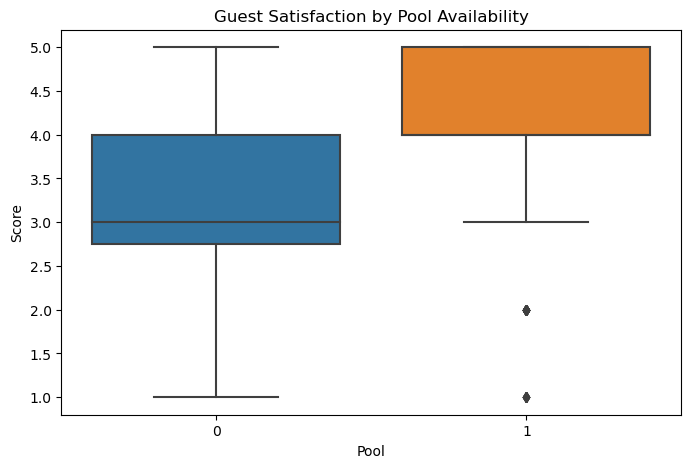

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pool', y='Score', data=df)
plt.title('Guest Satisfaction by Pool Availability')
plt.show()

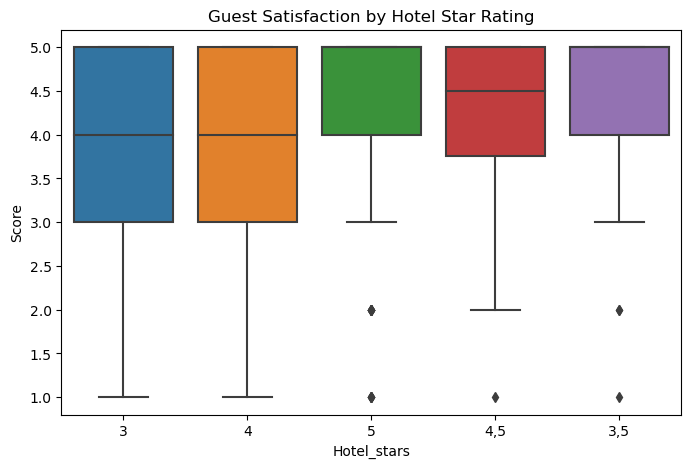

In [32]:
# Visualization for ANOVA results
plt.figure(figsize=(8, 5))
sns.boxplot(x='Hotel_stars', y='Score', data=df)
plt.title('Guest Satisfaction by Hotel Star Rating')
plt.show()

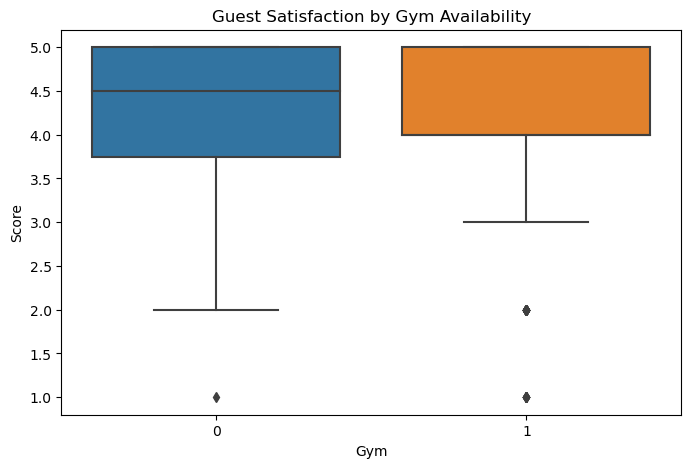

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gym', y='Score', data=df)
plt.title('Guest Satisfaction by Gym Availability')
plt.show()

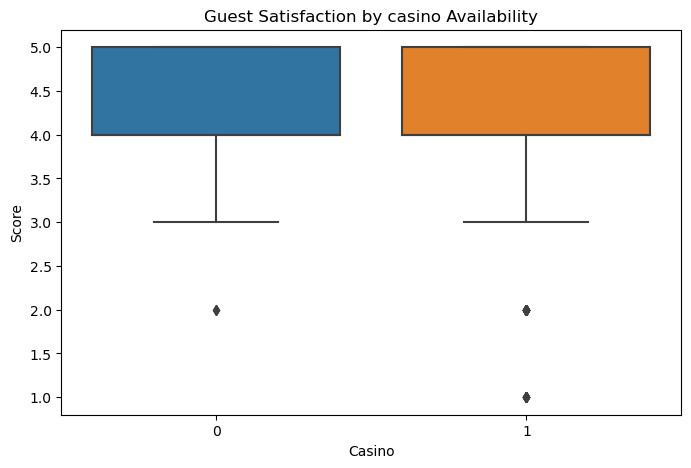

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Casino', y='Score', data=df)
plt.title('Guest Satisfaction by casino Availability')
plt.show()

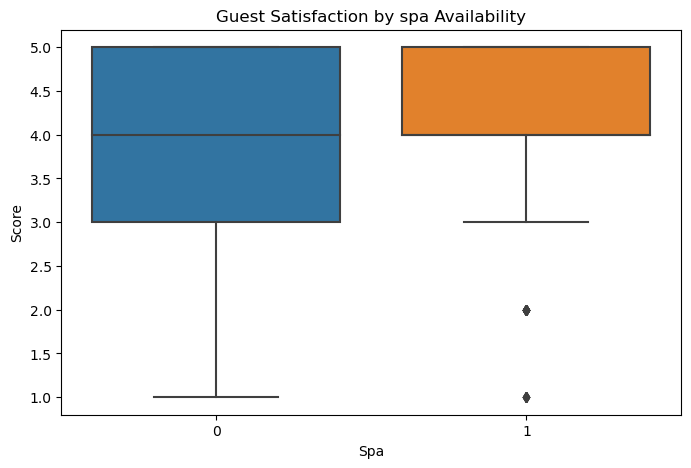

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Spa', y='Score', data=df)
plt.title('Guest Satisfaction by spa Availability')
plt.show()